In [3]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import sys, os; sys.path.insert(0, '../')
import BaryonForge as bfg
import pyccl as ccl
from astropy.io import fits

#Load cosmology object from CCL. Linear P(k) is needed since we use it for 2-halo term.
#We don't use P(k) anywhere else in this model, so it's ok to use linear P(k) throughout
#I use the specific values from S19 now
cosmo = ccl.Cosmology(Omega_c = 0.32 - 0.048 , Omega_b = 0.048, h=0.67, sigma8=0.83, n_s=0.96,
                      matter_power_spectrum='linear')
h = cosmo.cosmo.params.h

#Config params. Let's use the default values as deemed in Schneider19
bpar = dict(theta_ej = 4, theta_co = 0.1, 
            mu_beta = 1, #We set this to 1 and then change M_c to get the right \beta value
            eta = 0.3, eta_delta = 0.3, 
            tau = 0, tau_delta = 0, #They don't use a tau so we zero ours
            A = 0.09/2, #Factor 2 Needed so that the high-mass behaviors of our model is same as theirs
            M1 = 2.5e11/h,
            epsilon_h = 0.015, eta_cga = 0.6, a = 0.3, n = 2, epsilon = 4, p = 0.3, q = 0.707, 
            cdelta = 6.71, #This value is what I found was needed to reproduce their DMO profiles. The value is given in S15 too.
            gamma = 2, delta = 7)

In [143]:
bpar2 = {'epsilon_max': 20,
 'epsilon': 4.0,
 'theta_ej': 4.850770950317383,
 'theta_co': 0.09199385667724023,
 'M_c': 100000000000000,
 'mu_beta': 1.7652537822723389,
 'gamma': 2.6417267322540283,
 'delta': 14.413346290588379,
 'mu_theta_ej': 0.1,
 'mu_theta_co': 0.0,
 'M_theta_ej': 50000000000000.0,
 'M_theta_co': 50000000000000.0,
 'M_gamma': 50000000000000.0,
 'M_delta': 50000000000000.0,
 'eta': 0.03269648710828915,
 'eta_delta': 0.5558470451057594,
 'tau': -1.5,
 'tau_delta': 0,
 'A': 0.045,
 'M1': 300000000000.0,
 'epsilon_h': 0.015,
 'a': 0.3,
 'n': 2.0,
 'p': 0.3,
 'q': 0.707,
 'cdelta': None,
 'alpha_nt': 0.6,
 'nu_nt': 0.5,
 'gamma_nt': 0.5,
 'cutoff': 1000,
 'proj_cutoff': 1000,
 'nu_M_c': 0.0,
 'nu_theta_ej': 0.0}

In [144]:
GAS = bfg.Profiles.Schneider19.Gas(**bpar2)
PRS = bfg.Profiles.Thermodynamic.Pressure(**bpar2) * (1 - bfg.Profiles.Thermodynamic.NonThermalFrac(**bpar2))
OPRS = bfg.Profiles.Thermodynamic.Pressure(**bpar2)

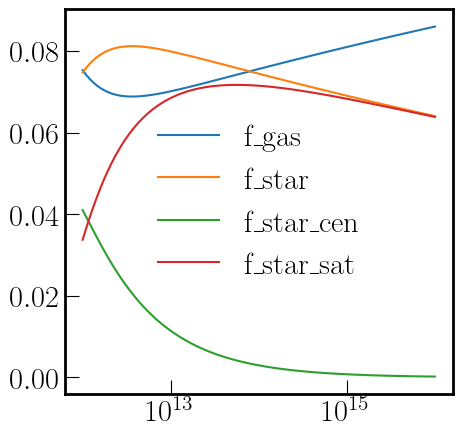

In [145]:
plt.figure(figsize = (5,5))
M = np.geomspace(1e12, 1e16, 100)

fg = GAS._get_gas_frac(M, 1, cosmo)
fs = GAS._get_star_frac(M, 1, cosmo)

plt.xscale('log')
plt.plot(M, fg[:, 0], label = 'f_gas')
plt.plot(M, fs[0][:, 0], label = 'f_star')
plt.plot(M, fs[1][:, 0], label = 'f_star_cen')
plt.plot(M, fs[2][:, 0], label = 'f_star_sat')

plt.legend()

Text(0, 0.5, '$r^2 P(r)$')

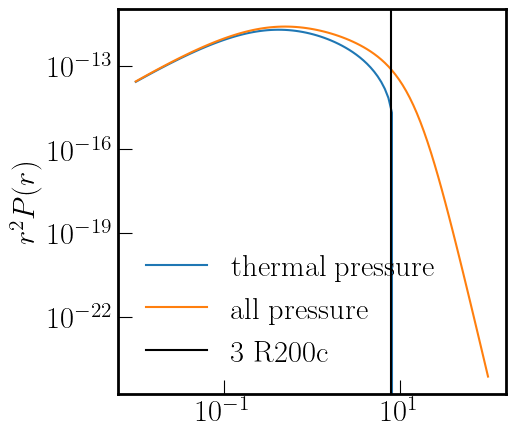

In [150]:
plt.figure(figsize = (5,5))
r = np.geomspace(1e-2, 1e2, 100)
M = 1e15
a = 1/(1 + 0.5)
plt.loglog()
plt.plot(r, r**2 * PRS.real(cosmo, r, M, a), label = 'thermal pressure')
plt.plot(r, r**2 * OPRS.real(cosmo, r, M, a), label = 'all pressure')

R   = GAS.mass_def.get_radius(cosmo, M, a)/a #in comoving Mpc

plt.axvline(3*R, color = 'k', label = '3 R200c')
plt.legend()
plt.ylabel(r'$r^2 P(r)$')

In [4]:
#Some plotting configs
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=22)
plt.rcParams["axes.linewidth"]  = 2.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]

# Download postprocessed TNG

This file was made by Dhayaa specifically for this example.

In [5]:
!rm TNG_300_2_data.npz
!wget -O TNG_300_2_data.npz "https://drive.google.com/uc?export=download&id=1EZ5zJ-jBZ8Vs8EtLNcPb_JDJcLn4nsW_"

rm: cannot remove 'TNG_300_2_data.npz': No such file or directory
--2025-07-28 08:47:23--  https://drive.google.com/uc?export=download&id=1EZ5zJ-jBZ8Vs8EtLNcPb_JDJcLn4nsW_
Resolving drive.google.com (drive.google.com)... 142.250.190.46, 2607:f8b0:4009:809::200e
Connecting to drive.google.com (drive.google.com)|142.250.190.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1EZ5zJ-jBZ8Vs8EtLNcPb_JDJcLn4nsW_&export=download [following]
--2025-07-28 08:47:24--  https://drive.usercontent.google.com/download?id=1EZ5zJ-jBZ8Vs8EtLNcPb_JDJcLn4nsW_&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.190.129, 2607:f8b0:4009:814::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.190.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11245531 (11M) [application/octet-stream]
Saving to: ‘TNG_300_2_data.npz’

T

# Load and plot maps

In [12]:
TNG = np.load('./TNG_300_2_data.npz', allow_pickle = True)
Halos = TNG['Halos_DMO'][()]
Map_DMO = TNG['Map_DMO'][()]
Map_FP  = TNG['Map_FP'][()]
Map_Pressure  = TNG['Map_Pressure'][()]
Map_Gas  = TNG['Map_Gas'][()]
Map_Stars  = TNG['Map_Stars'][()]

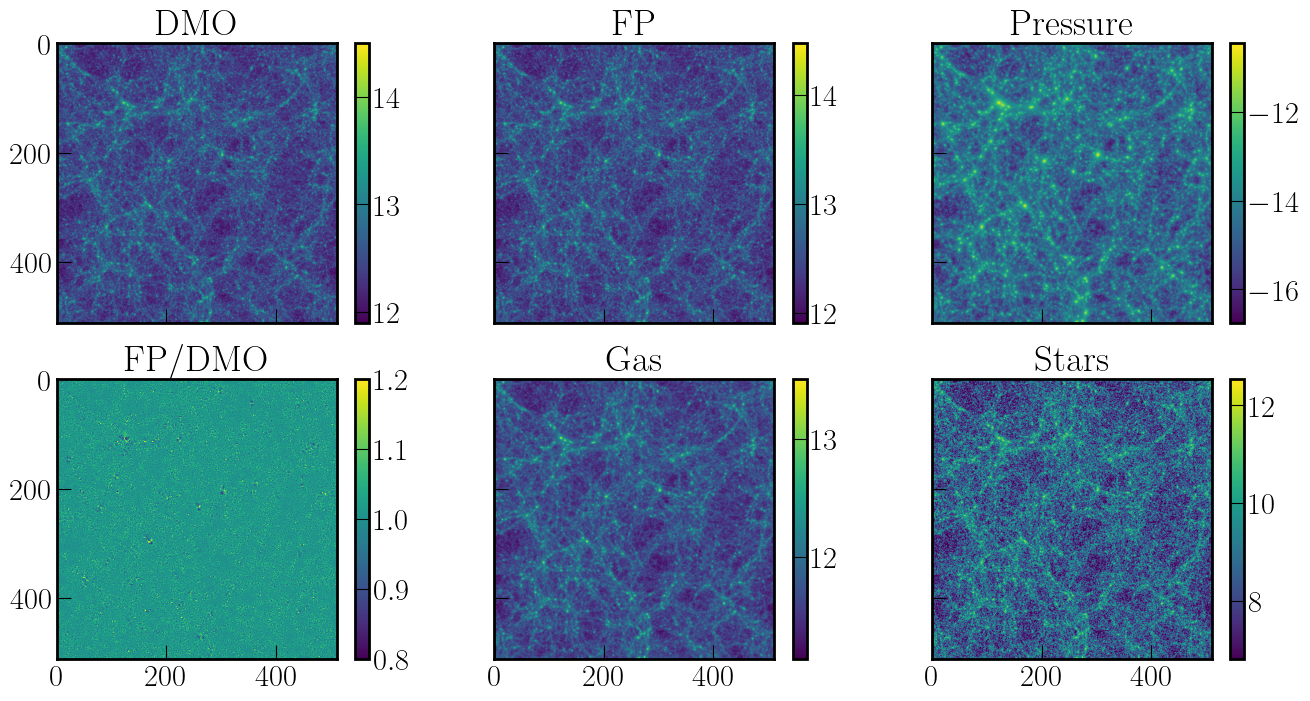

In [31]:
fig, ax = plt.subplots(2, 3, figsize = (16, 8), sharex = True, sharey = True)

i = (0,0)
x = ax[i].imshow(np.log10(Map_DMO)); ax[i].set_title('DMO'); plt.colorbar(x, ax = ax[i])

i = (1,0)
x = ax[i].imshow(Map_FP / Map_DMO, vmin = 0.8, vmax = 1.2); ax[i].set_title('FP/DMO'); plt.colorbar(x, ax = ax[i])

i = (0,1)
x = ax[i].imshow(np.log10(Map_FP)); ax[i].set_title('FP'); plt.colorbar(x, ax = ax[i])

i = (0,2)
x = ax[i].imshow(np.log10(Map_Pressure)); ax[i].set_title('Pressure'); plt.colorbar(x, ax = ax[i])

i = (1,1)
x = ax[i].imshow(np.log10(Map_Gas)); ax[i].set_title('Gas'); plt.colorbar(x, ax = ax[i])

i = (1,2)
x = ax[i].imshow(np.log10(Map_Stars + np.min(Map_Stars[Map_Stars>0]))); ax[i].set_title('Stars'); plt.colorbar(x, ax = ax[i])